In [1]:
import re
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Load the data

In [2]:
INPUT_CSV_PATH = "../data/1720574231/game_results.csv"
INPUT_LOG_DIR = "../logs/1720574231/"

#### 1.1 Load log data

In [3]:
# read the first log file
all_log_files = glob.glob(INPUT_LOG_DIR + "/*.log")
log_file = all_log_files[0]
with open(log_file, 'r') as f:
    log_data = f.readlines()
models_line = [line for line in log_data if 'Models:' in line][0]
model_a, model_b = models_line.split('Models: ')[1].split('vs')
model_a, model_b = model_a.strip(), model_b.strip()
print(f"Model A: {model_a}")
print(f"Model B: {model_b}")

animal_counts = {}
for log_file in all_log_files:
    with open(log_file, 'r') as f:
        log_lines = f.readlines()
        for line in log_lines:
            exp_line_split = line.split("run_experiment:116 - ")
            if len(exp_line_split) > 1:
                log_text_split = exp_line_split[1].split("  ")
                animal = log_text_split[1].strip()
                animal_counts[animal] = animal_counts.get(animal, 0) + 1
df_animals = pd.DataFrame(list(animal_counts.items()), columns=['animal', 'count'])
# print(df_animals.columns)
df_animals

Model A: llama3:8b-instruct-q8_0
Model B: gemma2:9b-instruct-q8_0


,animal,count
0,Eel,4632
1,Lion,4690
2,Narwhal,3818
3,Llama,1453
4,Aardvark,4000
...,...,...
154,Komodo dragon,5
155,Snake 🐍,2
156,Echidna (again),2
157,Nocturnal,3


#### 1.2 Load game results

In [4]:
df = pd.read_csv(INPUT_CSV_PATH)

# replace 'Model A' and 'Model B' with the actual model names
df['winner'] = df['winner'].replace('Model A', model_a)
df['winner'] = df['winner'].replace('Model B', model_b)

# Filter no winner
df = df[df['winner'] != 'No winner']

df

,experiment_number,winner,reason
0,1,gemma2:9b-instruct-q8_0,A disqualified: Lion \n\n\n\nDisqualified Rep...
1,2,gemma2:9b-instruct-q8_0,A disqualified: Disqualified Repeat animal.
2,3,llama3:8b-instruct-q8_0,B disqualified: Disqualified No animal name.
3,4,llama3:8b-instruct-q8_0,B disqualified: Disqualified repeated animal.
4,5,gemma2:9b-instruct-q8_0,A disqualified: Tiger \n\n\n\nDisqualified: Re...
...,...,...,...
95,96,gemma2:9b-instruct-q8_0,A disqualified: Tiger \n\n\n\nDisqualified: Re...
96,97,gemma2:9b-instruct-q8_0,A disqualified: Disqualified Repetitive animal.
97,98,llama3:8b-instruct-q8_0,B disqualified: Disqualified repeated animal.
98,99,llama3:8b-instruct-q8_0,B response too long (so not an animal)


### 2. Plot data

#### 2.1 Plot winners

Text(0.5, 1.0, 'Number of wins in Animal Word Game')

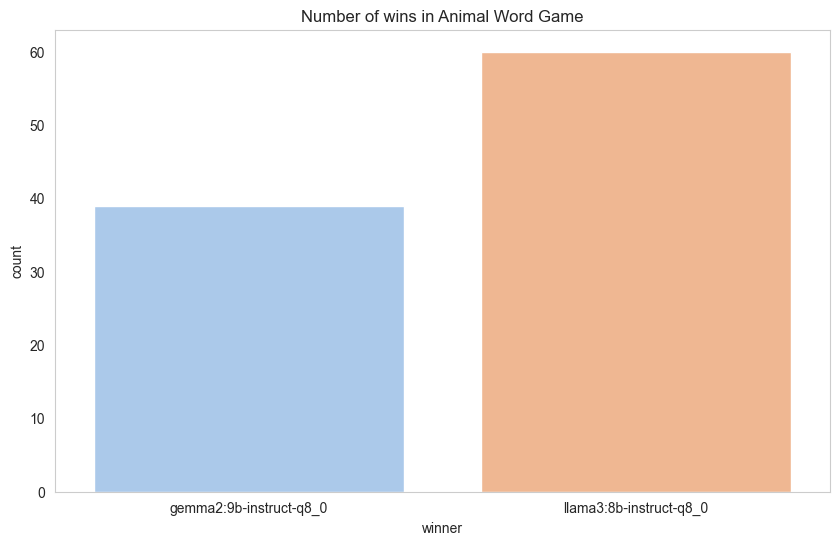

In [8]:
sns.set_palette("pastel")
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='winner', hue='winner')
plt.title(f"Number of wins in Animal Word Game")

#### 2.2 Plot animals

<Axes: xlabel='animal', ylabel='count'>

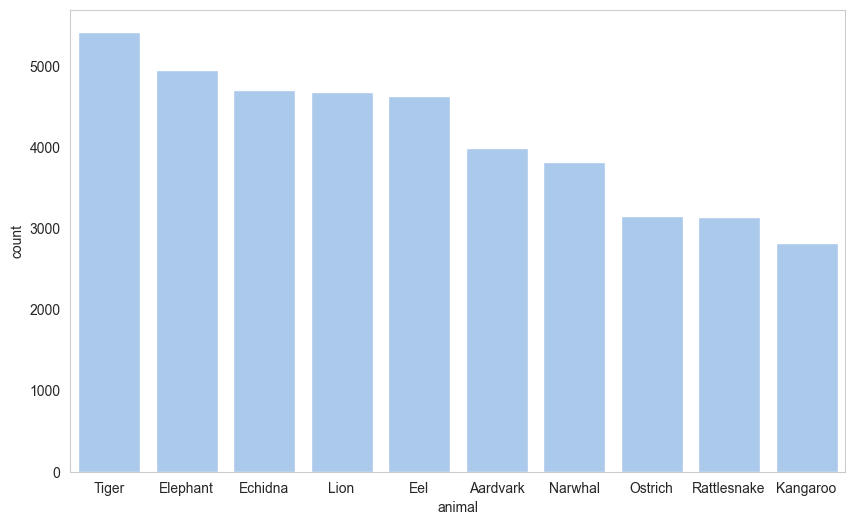

In [9]:
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(10, 6))
df_animal_top10 = df_animals.sort_values(by='count', ascending=False).head(10)
sns.barplot(data=df_animal_top10, x='animal', y='count')

#### 2.3 Count the reasons

Text(0.5, 1.0, 'Reasons for game endings')

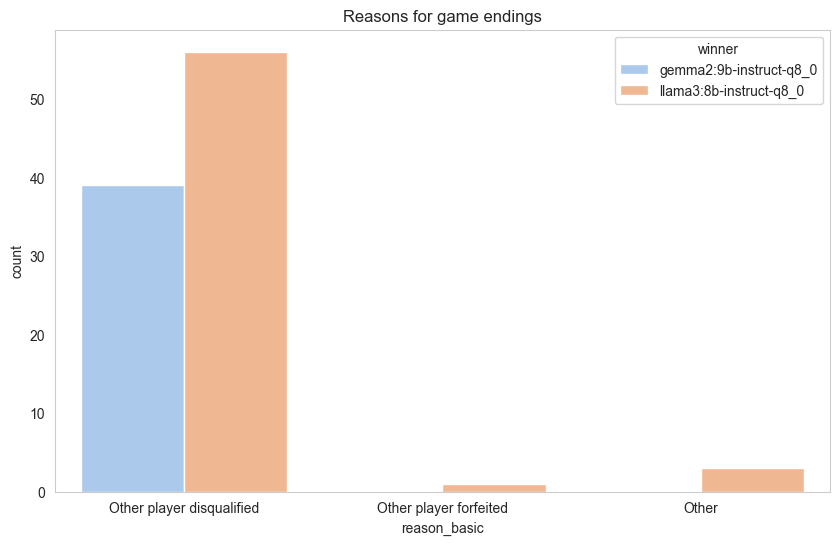

In [11]:
def get_basic_reason(reason_str):
    if "forfeit" in reason_str.lower():
        return "Other player forfeited"
    elif "disqualified" in reason_str.lower():
        return "Other player disqualified"
    elif "no conclusion" in reason_str.lower():
        return "No conclusion"
    else:
        return "Other"

df['reason_basic'] = df['reason'].apply(get_basic_reason)

sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='reason_basic', hue="winner")
plt.title(f"Reasons for game endings")

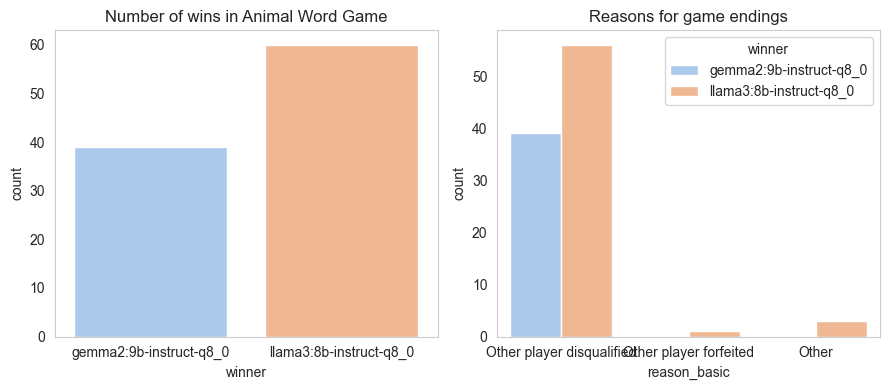

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style and palette for the plots
sns.set_palette("pastel")
sns.set_style("whitegrid", {'axes.grid': False})

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(9, 4))

# First plot: Number of wins in Animal Word Game
sns.countplot(data=df, x='winner', hue='winner', ax=axes[0])
axes[0].set_title("Number of wins in Animal Word Game")

# Function to classify reasons for game endings
def get_basic_reason(reason_str):
    if "forfeit" in reason_str.lower():
        return "Other player forfeited"
    elif "disqualified" in reason_str.lower():
        return "Other player disqualified"
    elif "no conclusion" in reason_str.lower():
        return "No conclusion"
    else:
        return "Other"

# Apply the function to the 'reason' column
df['reason_basic'] = df['reason'].apply(get_basic_reason)

# Second plot: Reasons for game endings
sns.countplot(data=df, x='reason_basic', hue="winner", ax=axes[1])
axes[1].set_title("Reasons for game endings")

# Show the combined plot
plt.tight_layout()
plt.show()